# **Random Forest**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('/content/drive/MyDrive/datasets/ml/Salary_Experience.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [19]:
x=df.YearsExperience.values.reshape(-1,1)
y=df.Salary

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)

In [71]:
from  sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=120,criterion='absolute_error')
rf.fit(xtrain,ytrain)

RandomForestRegressor(criterion='absolute_error', n_estimators=120)

In [72]:
rf.score(xtrain,ytrain)

0.9892256206236371

In [73]:
rf.score(xtest,ytest)

0.9753951243795315

In [74]:
df['pred']=rf.predict(x)
df

,YearsExperience,Salary,pred
0,1.1,39343,41080.083333
1,1.3,46205,43653.333333
2,1.5,37731,39699.166667
3,2.0,43525,41993.266667
4,2.2,39891,41159.558333
5,2.9,56642,57710.316667
6,3.0,60150,59084.283333
7,3.2,54445,59756.466667
8,3.2,64445,59756.466667
9,3.7,57189,58641.591667


In [75]:
rf.score(x,y)

0.9880657558665666

In [76]:
rf.predict([[4.5]])

array([59579.925])

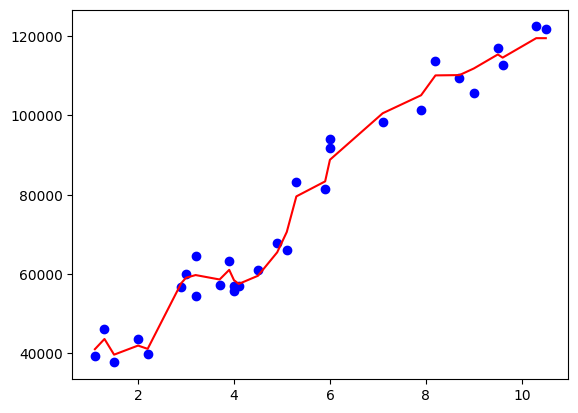

In [77]:
plt.scatter(x,y,color='blue')
plt.plot(x,rf.predict(x),color='red')
plt.show()

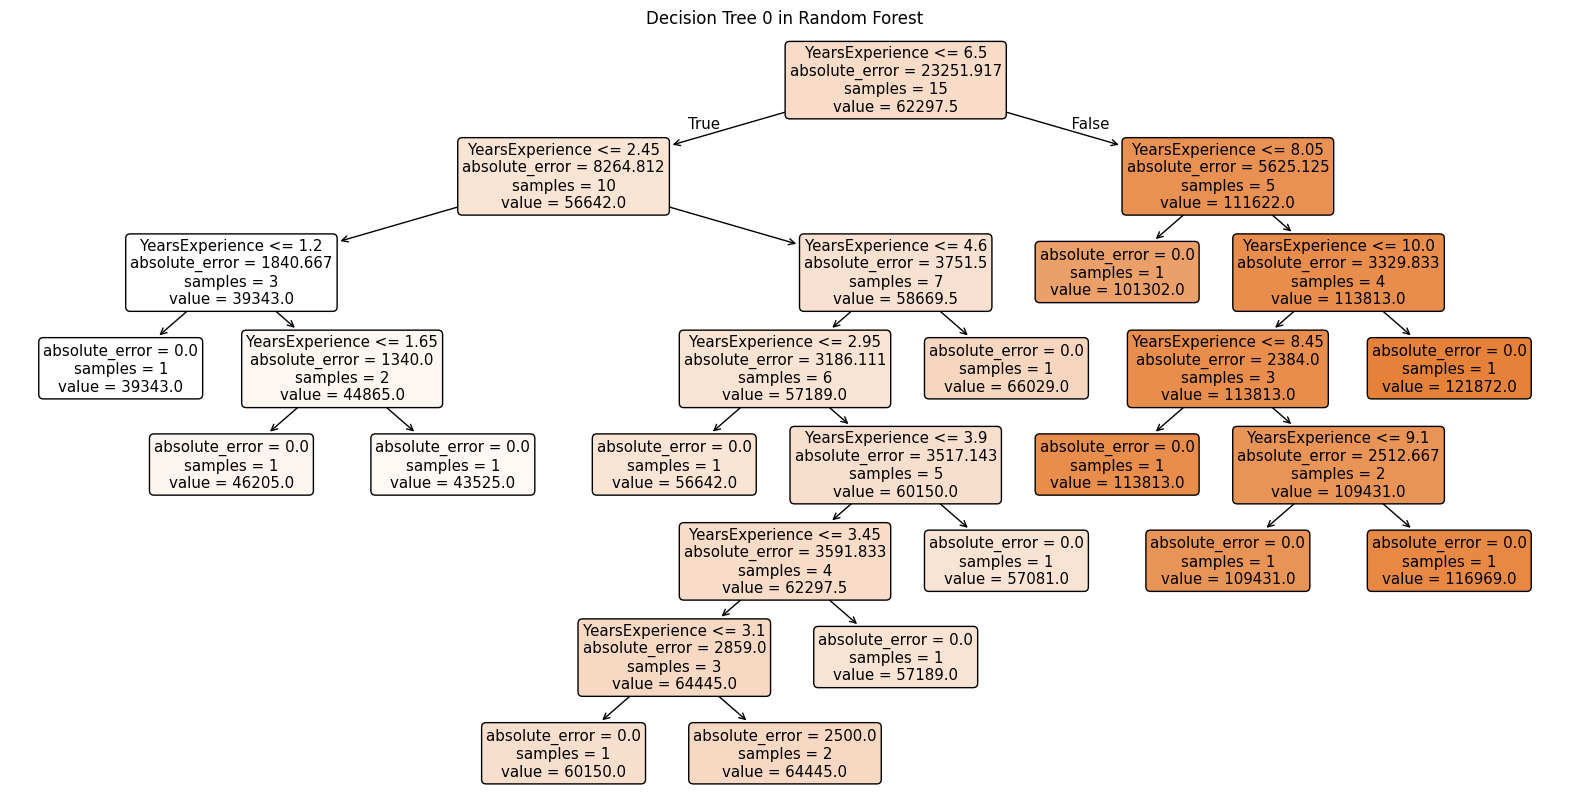

In [80]:
from sklearn.tree import plot_tree

tree_num = 0
plt.figure(figsize=(20, 10))

plot_tree(rf.estimators_[tree_num], feature_names=["YearsExperience"], filled=True, rounded=True)

plt.title(f"Decision Tree {tree_num} in Random Forest")
plt.show()


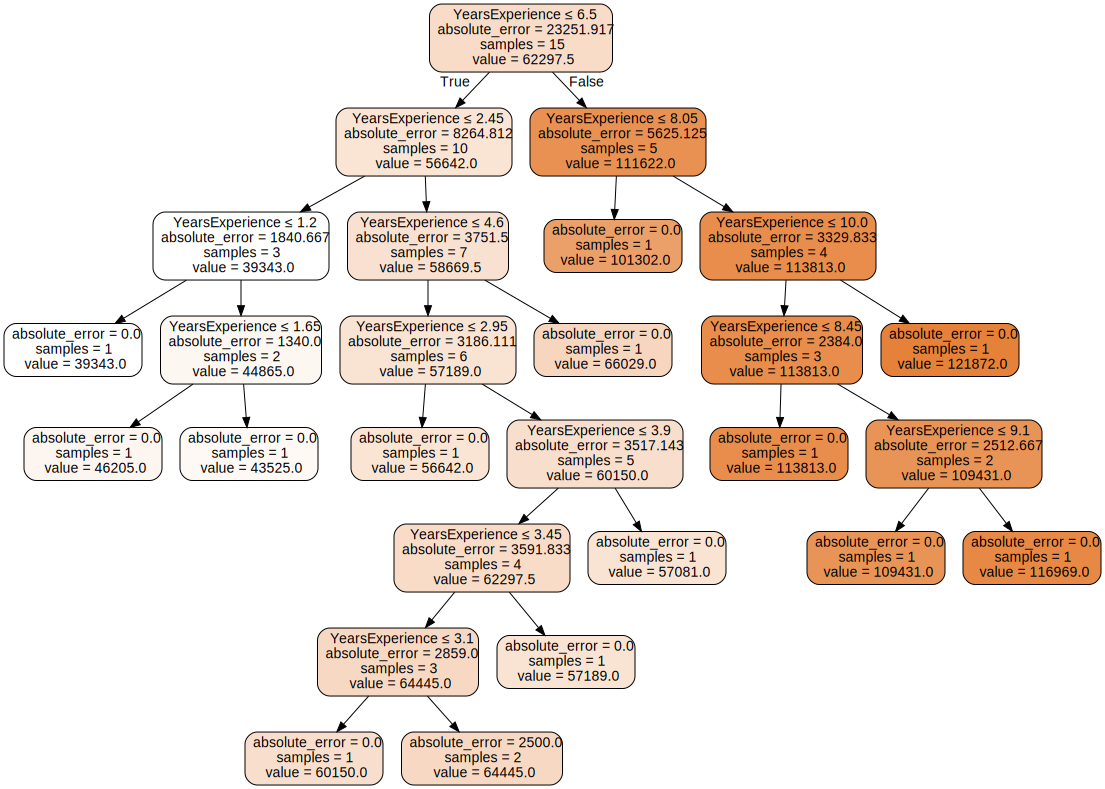

In [81]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    rf.estimators_[0],
    out_file=None,
    feature_names=["YearsExperience"],
    filled=True,
    rounded=True,
    special_characters=True
)

graphviz.Source(dot_data)
